<a href="https://colab.research.google.com/github/HarshESC/Company-Churn-Supervised-Learning-Analysis/blob/main/Final_Capstone_2_Churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Introduction:**
A telecomm company would like to predict their churn rate in order to make decisions for the future growth of their company.  

Telecom companies can suffer from voluntary churn. They spend thousands of dollars just to acquire a new customer.  But, when that customer leaves, the company not only loses the future revenue from that customer, but also the resources spent to acquire that customer.  As a result, it causes a loss in profits.

The churn rate helps determine whether customers tend to stay with the company.  

For example if a company has 25% churn rate then the average customer lifetime is 4 years; similarly a company with a churn rate of 50%, has an average customer lifetime of 2 years. It is estimated that 75 percent of the 17 to 20 million subscribers signing up with a new wireless carrier every year are coming from another wireless provider, which means they are churners. 

In this analysis, we will be exploring the rate at which customers churn using a series of Machine Learning Algorithms.  I will be using two techniques, Select K Best and Principal Component Analysis (PCA) in order to pick the best features that help predict the churn rate.  


### **Question:**
### Which machine learning algorithm can most accuracy can help the Telecommunication companies predict a churn rate?

### **2. Hypothesis:**

Ho: There is no significance between the machine learning algorithms with the best features picked for churn rate.

Ha:  There is significance between the machine learning algorithms with the best features picked for churn rate.  Specifically, I think the K Nearest Neighbor Algothim will provide the most accurate result.

### **3. Data:**
This dataset can be found on [Kaggle](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/discussion/235073), provided by the user david_becks.  

This public dataset is provided by the CrowdAnalytix community as part of their churn prediction competition. The real name of the telecom company is anonymized. It contains 20 predictor variables mostly about customer usage patterns. There are 3333 records in this dataset, out of which 483 customers are churners and the remaining 2850 are non-churners. 

Churn Rate in this dataset is marked by 0 or 1, where 0 means the Customer has not churned or left while 1 measn the customer has churned/left for another service.  The rest of the variables can be found in the Data Exploration section of the report.  


## 4. Methods

For this analysis I determined that my dataset is a Classification problem due to our target variable "churn" being a discrete number and having only two results.  

Next, I explored the data, found that there were no nulls or outliers interfering.  Then I used both Select K Best and Principal Component Analysis (PCA) to pick out the best features.  Those best features would be used to split up my dataset. 

The values from those features would be incorporated into the 5 Machine Learning Algorithms chosen (Decision Tree, Random Forest, K Nearest Neighbor, Support Vector Machine, and Gradient Boosting).     

I feel these three algorithms will offer a variety of models and provide us with the most efficient results.  


 
Before plugging in the features into each Machine Learning algorithm, a Grid Search is performed in order to find the optimal hyperparameters of a model, which results in the most 'accurate' predictions 

These optimals are plugged into each Machine Learning Algorithm, and then we will generate a Cross Validation Score, a Confusion Matrix, and a Classification report.  Each will dive into the accuracy of our various models.
 




### Data Exploration

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_regression, chi2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier


from google.colab import drive 
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/"
%cd "/content/gdrive/My Drive/Capstone 2"

Mounted at /content/gdrive
/content/gdrive/My Drive/Capstone 2


In [ ]:
df = pd.read_csv('churn.csv')
df = df.drop(['area code', 'phone number', 'state', 'international plan', 'voice mail plan'],axis=1)
df['churn'] = df['churn'].astype(int)



We will drop the following columns from the dataset as they do not help best predict whether a customer will churn:  

**area code, phone number, state, international plan & voice mail plan**

In [ ]:
df.churn.value_counts()


0    2850
1     483
Name: churn, dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   number vmail messages   3333 non-null   int64  
 2   total day minutes       3333 non-null   float64
 3   total day calls         3333 non-null   int64  
 4   total day charge        3333 non-null   float64
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total eve charge        3333 non-null   float64
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total night charge      3333 non-null   float64
 11  total intl minutes      3333 non-null   float64
 12  total intl calls        3333 non-null   int64  
 13  total intl charge       3333 non-null   float64
 14  customer service calls  3333 non-null   

In [ ]:
df.nunique()

account length             212
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [ ]:
# Check for nulls
df.isnull().sum()*100/df.isnull().count()


account length            0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64

In [ ]:
df.head(100)


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,104,0,278.4,106,47.33,81.0,113,6.89,163.2,137,7.34,9.8,5,2.65,1,0
96,73,0,160.1,110,27.22,213.3,72,18.13,174.1,72,7.83,13.0,4,3.51,0,0
97,99,0,198.2,87,33.69,207.3,76,17.62,190.9,113,8.59,8.7,3,2.35,4,0
98,120,0,212.1,131,36.06,209.4,104,17.80,167.2,96,7.52,5.3,5,1.43,1,1


# Explanation of each column


```
account length:  the number of days the account has been held by customer
phone number:  the phone number of the customer
number vmail message:  the nuber of vmail messages left by the customer
total day minutes:  the length of the call for the customer during the daytime
total day calls:  the number of calls made during the daytime
total day charge:  the rate for each call during the daytime
total eve minutes:  the length of the call during the evening
total eve call:  the total number of calls made during the evening.
total eve charge:  the rate charged for evening calls 
total night minutes:  the length of the call during the night
total night calls:  the total number of calls made during the night
total night charge  the rate charged for night calls
total intl minutes:  the length of time for international calls
total intl calls:  the number of international calls made 
total intl charge:  the rate of the international calls
customer service calls:  total number of customer service calls made
churn: if the customer has churned (left) (0 =no; 1 = yes)
```


In [ ]:
# Descriptive statistics.
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


It seems that on average, most people are less likely to churn, based on the rates being close to 0.  

Lets plot each feature to see how distributed they are

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04f4810fd0>,
      dtype=object)

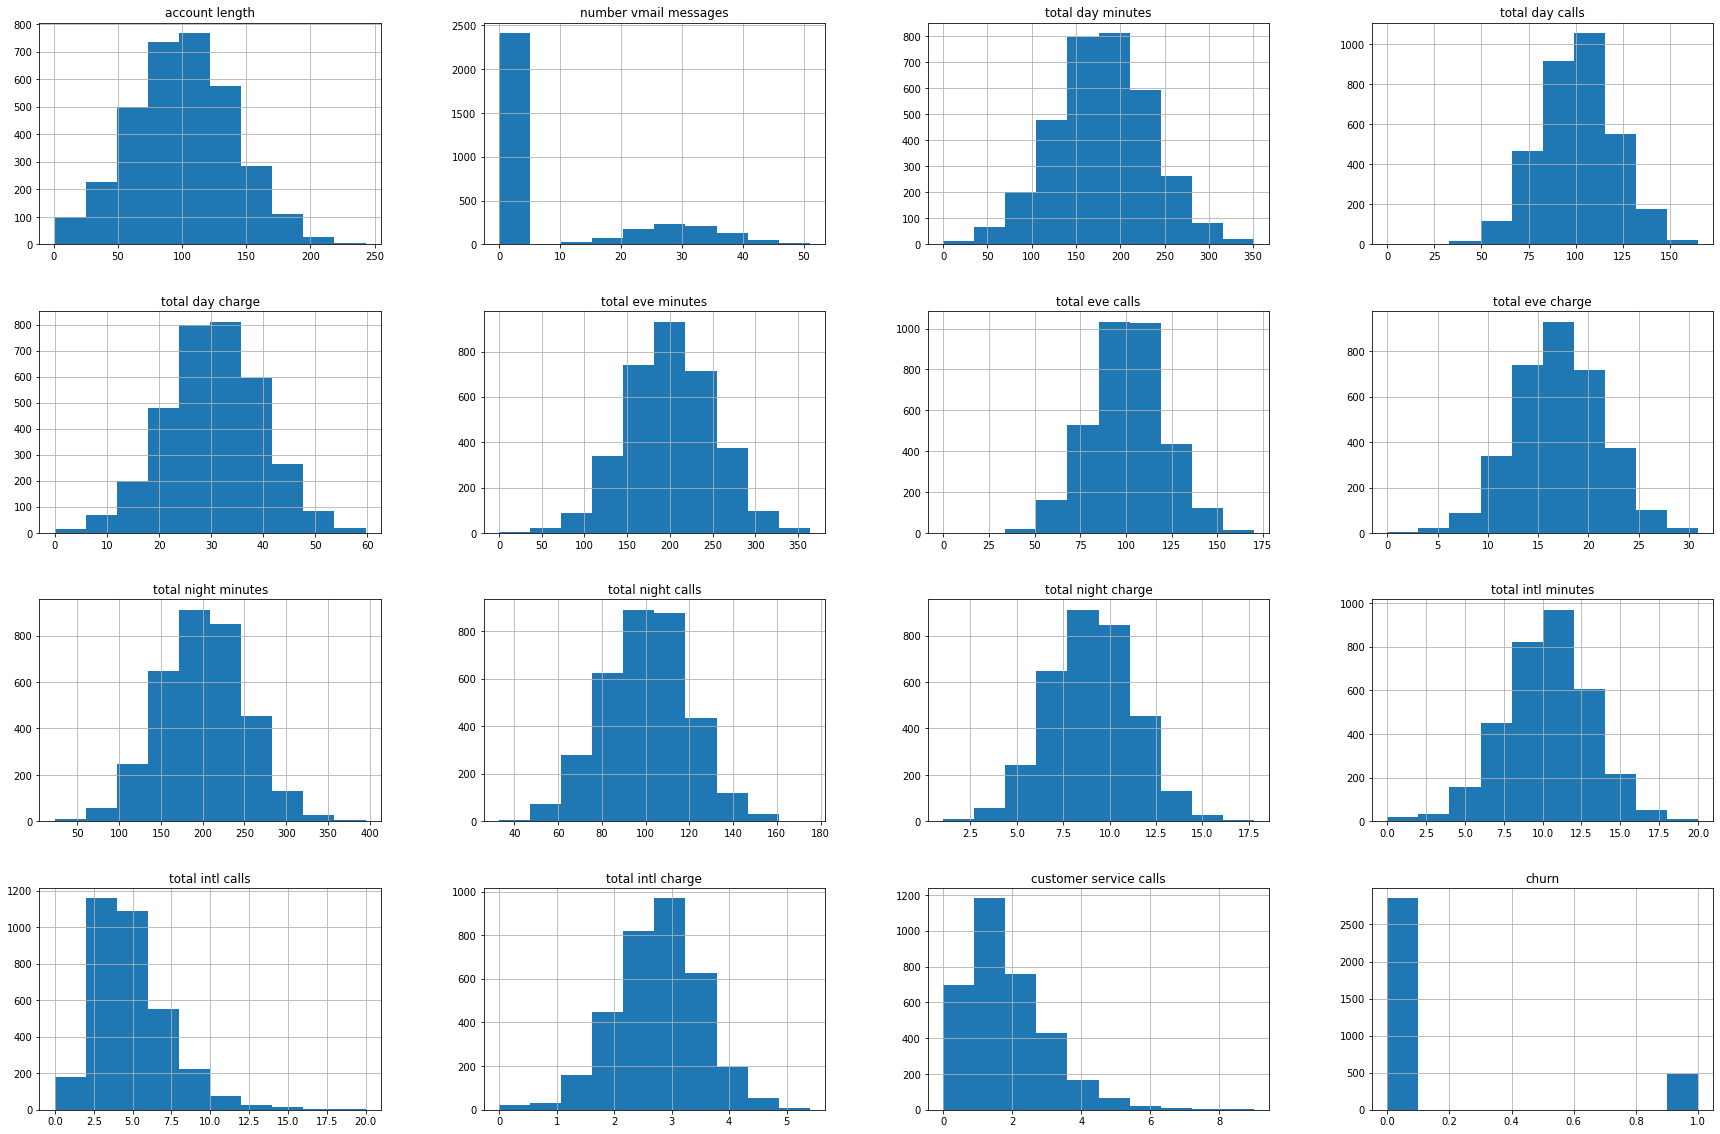

In [ ]:
df.hist(figsize=(30,20))


Out of these, the only truly normally distributed chart was Total Evening minutes.  Most of the other ones such as total intl chargetotal day calls, account length, are skewed in a direction. Customer service calls being the most notable example of right skewed.  

Lets analyze each feature in correlation with one another

Account Length, Total Day Minutes, 

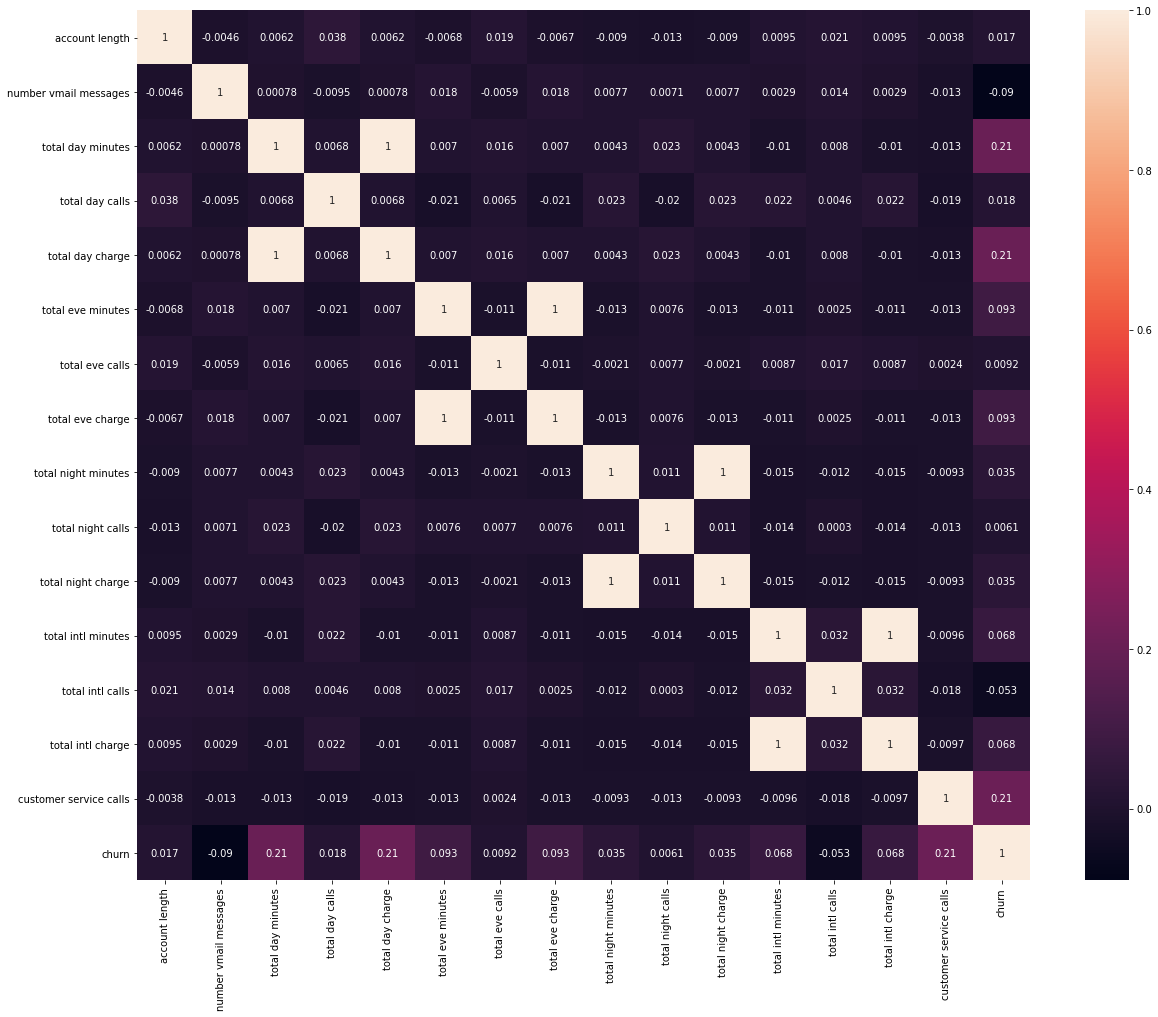


Correlation Table


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
number vmail messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493
total night calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.006141


In [ ]:
# Visualize correlation between independant variables and the target variable. Here, the target variable is 'Chance_of_Admit'
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot = True)
plt.show()

print()
print("Correlation Table")
# Correlation factors for 'Chance_of_Admit'.
df.corr()

From the chart above, barely any correlation exists between the majority of the features.  

The only ones that have any high correlation are the Total (Time) Minutes on call with the Total (Time) Charge.

The variables that have any kind of correlation with our target variable "churn" are:  total day minutes, total day charge, and customer service calls.  

### **Evaluation metric**
To evaluate the model I will use f1 score along with looking at the accuracy and f1. F1 is a balance of precision and recall.

In context of this dataset, a lower precision may mean more customers will be likely to churn while a higher one will be more customers will not churn.  As mentioned before, there are a lot more people that tend to stay with the company then leave.  If a customer leaves, then the company will lose money in profits and providing supplies/resources to that customer.  

A low recall means more people that will churn back are being predicted as not churning. 

Let's begin analyzing the features.  As there are quite a lot of feature in this dataset, we will limit the number of features we will see to 5.  

Starting with Select K Best, we will filter out any irrelvent features to our target variable "churn," and only use the features that have the impact.  

### Select K Best

To begin, Select K Best is a feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable.

Select K Best simply retains the first k features of X with the highest scores


In [ ]:
# Filter out features irrelevant to my target coiumn
# Split df into x and Y
target_col = "churn"
X = df.loc[:, df.columns != target_col]
y = df['churn']

# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)




In [ ]:
X_new =SelectKBest(score_func=chi2,k=5).fit_transform(X_train,y_train)
best = X_new[0:5]
best


array([[  0.  , 202.4 ,  34.41, 260.2 ,   3.  ],
       [  0.  , 132.9 ,  22.59,  67.  ,   3.  ],
       [ 12.  , 221.  ,  37.57, 151.  ,   2.  ],
       [  0.  , 278.9 ,  47.41, 190.2 ,   0.  ],
       [ 43.  , 177.9 ,  30.24, 175.1 ,   1.  ]])

The best features are: number vmail messages, today day minutes, total day charge, total evening minutes, customer service calls, and churn

In [ ]:
# Let's split up the features
X = df.drop(['account length', 'total day calls', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'churn'], axis=1)
y = df['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 450)


In [ ]:
X_train.head()

,number vmail messages,total day minutes,total day charge,total eve minutes,customer service calls
1012,0,104.9,17.83,198.5,2
3016,0,203.0,34.51,150.9,1
2035,0,203.5,34.60,289.6,3
237,0,74.5,12.67,200.8,3
1282,0,229.4,39.00,214.1,4


In [ ]:
y_train.head()

1012    0
3016    0
2035    0
237     0
1282    0
Name: churn, dtype: int64

Now that we've split up our dataset, let's incorporate the features into various Machine Learning Algorithms, starting with Decision Tree

### Decision Tree Classification with Select K Best

### Grid Search

In [ ]:
dtc = DecisionTreeClassifier()

params = {
'criterion': ['gini'],
'min_samples_leaf': range(1,10),
'max_depth': range(1,10)
}

gridTree = GridSearchCV(estimator=dtc,param_grid=params, scoring='f1')

In [ ]:
dtc.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
gridTree.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 10),


In [ ]:
gridTree.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7}

### Cross Validation, Confusion Matrix, and Classification Reports


In [ ]:
# Decision model with cross validation.

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    min_samples_leaf = 7,
    min_samples_split= 7
)
decision_tree.fit(X, y)
predict_test_dct = decision_tree.predict(X_test)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Churn', 'Did Not Churn'],
    filled=True
)
score = cross_val_score(decision_tree, X, y, cv=5)
print("Score : ",score)
print("Variance : ", format(score.std()**2, 'f'))


Score :  [0.90554723 0.91304348 0.92203898 0.91591592 0.92042042]
Variance :  0.000034


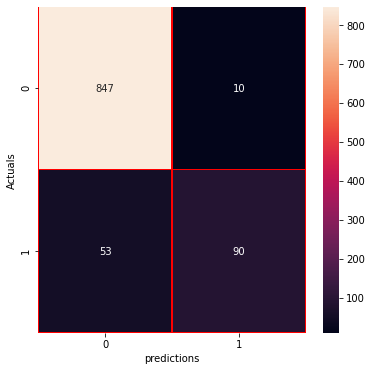


Classification Report

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       857
           1       0.51      0.54      0.53       143

    accuracy                           0.86      1000
   macro avg       0.72      0.73      0.72      1000
weighted avg       0.86      0.86      0.86      1000



In [ ]:
# Confusion matrix
cm_dct = confusion_matrix(y_test,predict_test_dct)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cm_dct,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

f1_score_dct = f1_score(y_test,predict_test_dct)
score_dct = decision_tree.score(X_test,y_test)

# train the model on train set
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
  
# print prediction results
predictions = model.predict(X_test)
print()
print("Classification Report")
print()
print(classification_report(y_test, predictions))



### Random Forest Classification

### Grid

In [ ]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()

X = df.drop(['account length', 'total day calls', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'churn'], axis=1)
y = df['churn']


params = {
    'criterion':['entropy','gini'],
    'max_depth':[3,4,7],
    'class_weight':['balanced','balanced_subsample']
}
gridRFC = GridSearchCV(rfc,params,scoring='f1')



In [ ]:
gridRFC.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
gridRFC.best_params_

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 7}

### Cross Validation

In [ ]:
rfc1 = ensemble.RandomForestClassifier()
params = {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7}

X = df.drop(['account length', 'total day calls', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'churn'], axis=1)
y = df['churn']

rfc1.fit(X_train,y_train)
predict_test_rfc = rfc1.predict(X_test)

score = cross_val_score(rfc1, X, y, cv=5)
print("Cross validation Score : ",score)
print("Variance : ",format(score.std()**2, 'f'))

Cross validation Score :  [0.91304348 0.91304348 0.92053973 0.92192192 0.92642643]
Variance :  0.000027


Confusion Matrix & Classification Report

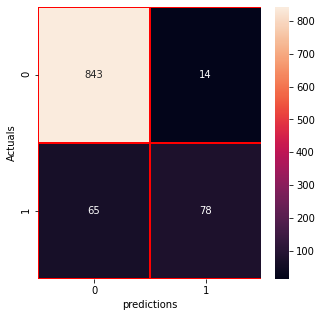


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       857
           1       0.90      0.55      0.68       143

    accuracy                           0.93      1000
   macro avg       0.91      0.77      0.82      1000
weighted avg       0.93      0.93      0.92      1000



In [ ]:
# Confusion matrix
cm_rfc = confusion_matrix(y_test,predict_test_rfc)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

f1_score_rfc = f1_score(y_test,predict_test_rfc)
score_rfc = rfc1.score(X_test,y_test)

# train the model on train set
model = RandomForestClassifier()
model.fit(X_train, y_train)
# print prediction results
print()
print("Classification Report:")
print()  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


### K Nearest Neighbor Classification

In [ ]:
# KNN Regression model with cross validation.

knnc = neighbors.KNeighborsClassifier()

params = {
    'n_neighbors' : [2,3,5,7,10],
    'weights' : ['uniform','distance']
}
gridknnc = GridSearchCV(estimator=knnc,param_grid=params,scoring='neg_root_mean_squared_error')

### Grid Search

In [ ]:
gridknnc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [ ]:
gridknnc.best_params_


{'n_neighbors': 10, 'weights': 'uniform'}

In [ ]:
knnc2 = neighbors.KNeighborsClassifier(n_neighbors=7, weights='uniform')
X = df.drop(['account length', 'total day calls', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'churn'], axis=1)
y = df['churn']

### Cross Validation

In [ ]:
# Cross Validation Score

knnc2.fit(X_train,y_train)
predict_test_knnc2 = knnc2.predict(X_test)

score = cross_val_score(knnc2, X, y, cv=5)
print("Score : ",score)
print("Variance : ",format(score.std()**2, 'f'))

Score :  [0.88455772 0.88155922 0.88905547 0.8993994  0.89489489]
Variance :  0.000043


### Confusion Matrix and Classification Report

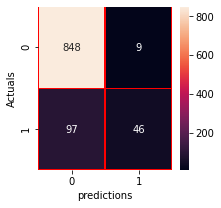


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       857
           1       0.88      0.55      0.67       143

    accuracy                           0.92      1000
   macro avg       0.90      0.77      0.81      1000
weighted avg       0.92      0.92      0.92      1000



In [ ]:
# Confusion matrix
cm_knnc2 = confusion_matrix(y_test,predict_test_knnc2)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_knnc2,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

f1_score_knnc2 = f1_score(y_test,predict_test_knnc2)
score_knnc2 = knnc2.score(X_test,y_test)

# train the model on train set
model = RandomForestClassifier()
model.fit(X_train, y_train)
# print prediction results
print()
print("Classification Report:")
print()  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


### SVM (Support Vector Machines)


### Grid

In [ ]:
svcc = SVC()
params = {'kernel': ['rbf'], 'C': [1, 10, 100, 1000]}
gridsvcc = GridSearchCV(svcc,params,scoring='f1')
gridsvcc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
gridsvcc.best_params_

{'C': 1000, 'kernel': 'rbf'}

In [ ]:
svcc2 = SVC()

params = [{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}]

X = df.drop(['account length', 'total day calls', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'churn'], axis=1)
y = df['churn']

### Cross Validation

In [ ]:
#Cross Validation Score

svcc2.fit(X_train,y_train)
predict_test_svcc2 = svcc2.predict(X_test)

score = cross_val_score(svcc2, X, y, cv=5)
print("Score : ",score)
print("Variance : ",format(score.std()**2, 'f'))

Score :  [0.87706147 0.86806597 0.86506747 0.87537538 0.87087087]
Variance :  0.000020


### Confusion Matrix and Classification Report

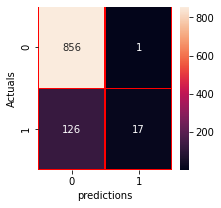


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       857
           1       0.88      0.55      0.68       143

    accuracy                           0.93      1000
   macro avg       0.90      0.77      0.82      1000
weighted avg       0.92      0.93      0.92      1000



In [ ]:
#Confusion matrix
cm_svcc2 = confusion_matrix(y_test,predict_test_svcc2)

#Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_svcc2,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

f1_score_svcc2 = f1_score(y_test,predict_test_svcc2)
score_svcc2 = svcc2.score(X_test,y_test)

#train the model on train set
model = RandomForestClassifier()
model.fit(X_train, y_train)
#print prediction results
print()
print("Classification Report:")
print()  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


### Gradient Boosting

Grid

In [ ]:
gbc = ensemble.GradientBoostingClassifier()
params = {'n_estimators': [100], 
          'max_depth': [5],
          'loss': ['deviance']}

gridgbc = GridSearchCV(gbc,params,scoring='f1')
gridgbc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [ ]:
gridgbc.best_params_

{'loss': 'deviance', 'max_depth': 5, 'n_estimators': 100}

In [ ]:
# Initialize and fit the model.
gb2 = ensemble.GradientBoostingClassifier()

params = {'loss': 'deviance', 'max_depth': 5, 'n_estimators': 100}



X = df.drop(['account length', 'total day calls', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'churn'], axis=1)
y = df['churn']
gb2.fit(X_train, y_train)

predict_train = gb2.predict(X_train)
predict_test = gb2.predict(X_test)


### Cross Validation Score

In [ ]:
# Cross Validation Score

gb2.fit(X_train,y_train)
predict_test_gb2 = gb2.predict(X_test)

score = cross_val_score(gb2, X, y, cv=5)
print("Score : ",score)
print("Variance : ",format(score.std()**2, 'f'))

Score :  [0.91004498 0.91004498 0.92203898 0.92342342 0.92642643]
Variance :  0.000049


### Confusion Matrix and Classification Report

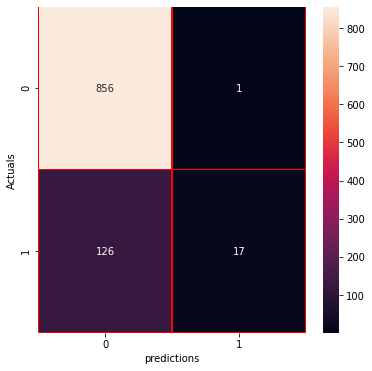


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       857
           1       0.91      0.55      0.68       143

    accuracy                           0.93      1000
   macro avg       0.92      0.77      0.82      1000
weighted avg       0.93      0.93      0.92      1000



In [ ]:
# Confusion matrix
cm_gb2 = confusion_matrix(y_test,predict_test_svcc2)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cm_gb2, annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

f1_score_gb2 = f1_score(y_test,predict_test_gb2)
score_gb2 = gb2.score(X_test,y_test)

# train the model on train set
model = ensemble.GradientBoostingClassifier()
model.fit(X_train, y_train)
# print prediction results
print()
print("Classification Report:")
print()  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


### Compare the Models 

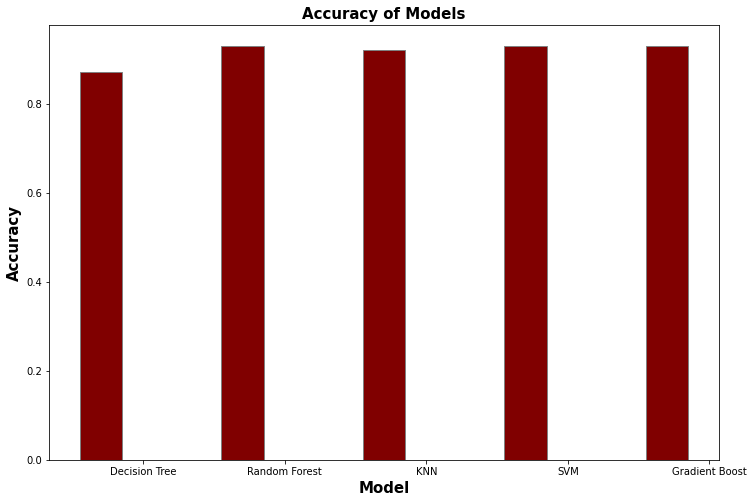

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
skb = [0.87, 0.93, 0.92, 0.93, 0.93]

 
# Set position of bar on X axis
br1 = np.arange(len(skb))

plt.title("Accuracy of Models",fontweight ='bold', fontsize = 15)

# Make the plot
plt.bar(br1, skb, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Select K Best')

# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(skb))],
        ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Gradient Boost'])
 
plt.show()

Seems that all of the models are fairly accurate in predicting churn.  The most accurate being a tie between Random Forest, SVM, and Gradient Boost

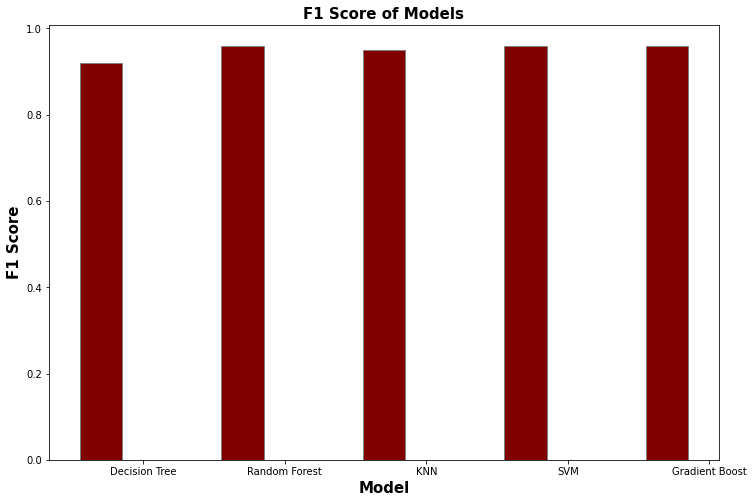

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
skbf1 = [0.92, 0.96, 0.95, 0.96, 0.96]

 
# Set position of bar on X axis
br1 = np.arange(len(skbf1))

plt.title("F1 Score of Models",fontweight ='bold', fontsize = 15)

# Make the plot
plt.bar(br1, skbf1, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Select K Best')
# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('F1 Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(skbf1))],
        ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Gradient Boost'])
 
plt.show()

In terms of F1 score, it seems that all of them are fairly even, with a tie between Random Fores,t SVM, and Gradient Boost F1 score of 0.96.  

### Principal Component Analysis (PCA)

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.  

In the dataset below, I will be reducing the dimensionality to 2 features.

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(df)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaledData = Scaler.transform(df)

In [ ]:
scaledData

array([[ 0.67648946,  1.23488274,  1.56676695, ..., -0.0856905 ,
        -0.42793202, -0.41167182],
       [ 0.14906505,  1.30794844, -0.33373776, ...,  1.2411686 ,
        -0.42793202, -0.41167182],
       [ 0.9025285 , -0.59175986,  1.16830364, ...,  0.69715637,
        -1.1882185 , -0.41167182],
       ...,
       [-1.83505538, -0.59175986,  0.01881963, ...,  1.3871231 ,
         0.33235445, -0.41167182],
       [ 2.08295458, -0.59175986,  0.62477766, ..., -1.87695028,
         0.33235445, -0.41167182],
       [-0.67974475,  1.23488274,  1.00304237, ...,  1.2411686 ,
        -1.1882185 , -0.41167182]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [ ]:
pca_xnew = pca.fit(scaledData)

In [ ]:
x_pca = pca.transform(scaledData)

In [ ]:
scaledData.shape

(3333, 16)

In [ ]:
x_pca.shape

(3333, 2)

In [ ]:
scaledData

array([[ 0.67648946,  1.23488274,  1.56676695, ..., -0.0856905 ,
        -0.42793202, -0.41167182],
       [ 0.14906505,  1.30794844, -0.33373776, ...,  1.2411686 ,
        -0.42793202, -0.41167182],
       [ 0.9025285 , -0.59175986,  1.16830364, ...,  0.69715637,
        -1.1882185 , -0.41167182],
       ...,
       [-1.83505538, -0.59175986,  0.01881963, ...,  1.3871231 ,
         0.33235445, -0.41167182],
       [ 2.08295458, -0.59175986,  0.62477766, ..., -1.87695028,
         0.33235445, -0.41167182],
       [-0.67974475,  1.23488274,  1.00304237, ...,  1.2411686 ,
        -1.1882185 , -0.41167182]])

In [ ]:
x_pca

array([[ 1.82175471, -1.07849009],
       [-0.49670389, -0.01806575],
       [ 0.15424116,  0.75011737],
       ...,
       [ 0.82836033,  2.0617294 ],
       [ 0.10424441, -0.7620822 ],
       [ 1.82651502,  0.72715559]])

In [ ]:
# Filter out features irrelevant to my target coiumn
# Split df into x and Y
target_col = "churn"
X2 = x_pca
y2 = df['churn']

# Split the data into train and test with 70% data being used for training
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    test_size=0.30, 
                                                    random_state=42)


### Decision Tree with PCA

### Grid 

In [ ]:
dtc2 = DecisionTreeClassifier()

params = {
'criterion': ['gini'],
'min_samples_leaf': range(1,10),
'max_depth': range(1,10)
}

gridTreePCA = GridSearchCV(estimator=dtc2,param_grid=params, scoring='f1')

In [ ]:
dtc.fit(X2_train, y2_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
gridTreePCA.fit(X2_train, y2_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 10),


In [ ]:
gridTreePCA.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 9}

### Cross Validation

In [ ]:
# Decision model with cross validation.

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    min_samples_leaf = 1,
    max_depth= 1
)
decision_tree.fit(X2, y2)
predict_test_dct = decision_tree.predict(X2_test)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    class_names=['Churn', 'Did Not Churn'],
    filled=True
)
score = cross_val_score(decision_tree, X2, y2, cv=5)
print("Score : ",score)
print("Variance : ", format(score.std()**2, 'f'))


Score :  [0.91004498 0.90104948 0.91454273 0.90990991 0.91441441]
Variance :  0.000024


### Confusion Matrix & Classification Report

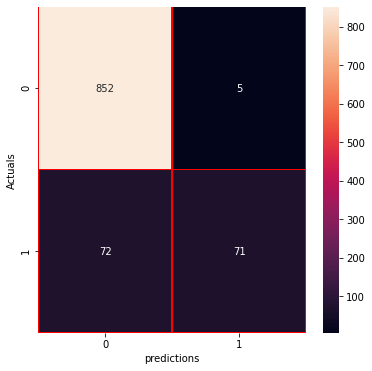


Classification Report

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       857
           1       0.50      0.54      0.52       143

    accuracy                           0.86      1000
   macro avg       0.71      0.72      0.72      1000
weighted avg       0.86      0.86      0.86      1000



In [ ]:
# Confusion matrix
cm_dct = confusion_matrix(y2_test,predict_test_dct)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cm_dct,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

f1_score_dct = f1_score(y2_test,predict_test_dct)
score_dct = decision_tree.score(X2_test,y2_test)

# train the model on train set
model = DecisionTreeClassifier()
model.fit(X2_train, y2_train)
  
# print prediction results
predictions = model.predict(X2_test)
print()
print("Classification Report")
print()
print(classification_report(y2_test, predictions))



### Random Forest with PCA

### Grid Search

In [ ]:
from sklearn import ensemble

rfc2 = ensemble.RandomForestClassifier()

params = {
    'criterion':['entropy','gini'],
    'max_depth':[3,4,7],
    'class_weight':['balanced','balanced_subsample']
}
gridRFC2 = GridSearchCV(rfc2,params,scoring='f1')



In [ ]:
gridRFC2.fit(X2_train, y2_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
gridRFC2.best_params_

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3}

### Cross Validation

In [ ]:
rfc2 = ensemble.RandomForestClassifier()
params = {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 3}

rfc2.fit(X2_train,y2_train)
predict_test_rfc = rfc2.predict(X2_test)

score = cross_val_score(rfc2, X2, y2, cv=5)
print("Cross validation Score : ",score)
print("Variance : ",format(score.std()**2, 'f'))

Cross validation Score :  [0.90404798 0.89955022 0.90404798 0.9024024  0.90690691]
Variance :  0.000006


### Confusion Matrix and Classification Report

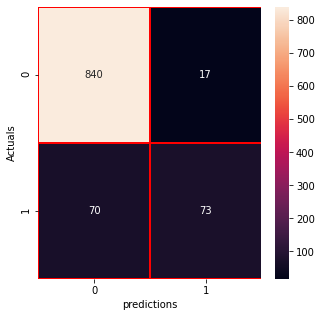


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       857
           1       0.80      0.50      0.61       143

    accuracy                           0.91      1000
   macro avg       0.86      0.74      0.78      1000
weighted avg       0.90      0.91      0.90      1000



In [ ]:
# Confusion matrix
cm_rfc2 = confusion_matrix(y2_test,predict_test_rfc)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc2,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

f1_score_rfc = f1_score(y2_test,predict_test_rfc)
score_rfc = rfc2.score(X2_test,y2_test)

# train the model on train set
model = RandomForestClassifier()
model.fit(X2_train, y2_train)
# print prediction results
print()
print("Classification Report:")
print()  
# print prediction results
predictions = model.predict(X2_test)
print(classification_report(y2_test, predictions))


### K Nearest Neighbor Classification with PCA

In [ ]:
# KNN Regression model with cross validation.

knncPCA = neighbors.KNeighborsClassifier()

params = {
    'n_neighbors' : [2,3,5,7,10],
    'weights' : ['uniform','distance']
}
gridknncPCA = GridSearchCV(estimator=knncPCA,param_grid=params,scoring='neg_root_mean_squared_error')

In [ ]:
gridknncPCA.fit(X2_train, y2_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [ ]:
gridknncPCA.best_params_


{'n_neighbors': 10, 'weights': 'uniform'}

### Cross Validation

In [ ]:
# Cross Validation Score

knncPCA.fit(X2_train,y2_train)
predict_test_knnc2 = knncPCA.predict(X2_test)

score = cross_val_score(knnc2, X2, y2, cv=5)
print("Score : ",score)
print("Variance : ",format(score.std()**2, 'f'))

Score :  [0.91154423 0.89505247 0.90554723 0.91291291 0.91141141]
Variance :  0.000044


### Confusion Matrix and Classification Report

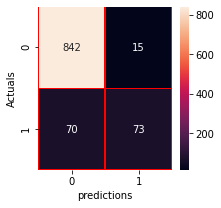


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       857
           1       0.83      0.51      0.63       143

    accuracy                           0.92      1000
   macro avg       0.88      0.75      0.79      1000
weighted avg       0.91      0.92      0.91      1000



In [ ]:
# Confusion matrix
cm_knncPCA = confusion_matrix(y2_test,predict_test_knnc2)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_knncPCA,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

f1_score_knnc2 = f1_score(y2_test,predict_test_knnc2)
score_knnc2 = knncPCA.score(X2_test,y2_test)

# train the model on train set
model = neighbors.KNeighborsClassifier()
model.fit(X2_train, y2_train)
# print prediction results
print()
print("Classification Report:")
print()  
# print prediction results
predictions = model.predict(X2_test)
print(classification_report(y2_test, predictions))


### SVM (Support Vector Machine) with PCA

### Grid Search

In [ ]:
svccPCA = SVC()
params = {'kernel': ['rbf'], 'C': [1, 10, 100, 1000]}
gridsvccPCA = GridSearchCV(svccPCA,params,scoring='f1')
gridsvccPCA.fit(X2_train, y2_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
gridsvccPCA.best_params_

{'C': 1000, 'kernel': 'rbf'}

In [ ]:
svccPCA = SVC()
params = [{'C': 1000, 'kernel': 'rbf'}]


### Cross Validation

In [ ]:
#Cross Validation Score

svccPCA.fit(X2_train,y2_train)
predict_test_svcc2 = svccPCA.predict(X2_test)

score = cross_val_score(svccPCA, X2, y2, cv=5)
print("Score : ",score)
print("Variance : ",format(score.std()**2, 'f'))

Score :  [0.91004498 0.90104948 0.91154423 0.91441441 0.91291291]
Variance :  0.000022


### Confusion Matrix and Classification Report

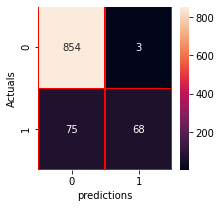


Classification Report:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       857
           1       0.96      0.48      0.64       143

    accuracy                           0.92      1000
   macro avg       0.94      0.74      0.80      1000
weighted avg       0.92      0.92      0.91      1000



In [ ]:
#Confusion matrix
cm_svccPCA = confusion_matrix(y2_test,predict_test_svcc2)

#Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_svccPCA,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

f1_score_svcc2 = f1_score(y2_test,predict_test_svcc2)
score_svcc2 = svccPCA.score(X2_test,y2_test)

#train the model on train set
model = SVC()
model.fit(X2_train, y2_train)
#print prediction results
print()
print("Classification Report:")
print()  
# print prediction results
predictions = model.predict(X2_test)
print(classification_report(y2_test, predictions))


### Gradient Boosting Classifier 

## Grid

In [ ]:
gbcPCA = ensemble.GradientBoostingClassifier()
params = {'n_estimators': [100], 
          'max_depth': [5],
          'loss': ['deviance']}

gridgbcPCA = GridSearchCV(gbcPCA,params,scoring='f1')
gridgbcPCA.fit(X2_train, y2_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [ ]:
gridgbcPCA.best_params_

{'loss': 'deviance', 'max_depth': 5, 'n_estimators': 100}

In [ ]:
# Initialize and fit the model.
gb2PCA = ensemble.GradientBoostingClassifier()

params = {'loss': 'deviance', 'max_depth': 5, 'n_estimators': 100}



gb2PCA.fit(X2_train, y2_train)

predict_train = gb2PCA.predict(X2_train)
predict_test = gb2PCA.predict(X2_test)


### Cross Validation

In [ ]:
# Cross Validation Score

gb2PCA.fit(X2_train,y2_train)
predict_test_gb2PCA = gb2PCA.predict(X2_test)

score = cross_val_score(gb2PCA, X2, y2, cv=5)
print("Score : ",score)
print("Variance : ",format(score.std()**2, 'f'))

Score :  [0.90104948 0.89805097 0.90854573 0.90840841 0.91291291]
Variance :  0.000030


### Confusion Matrix

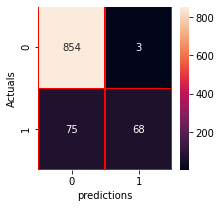


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       857
           1       0.92      0.47      0.62       143

    accuracy                           0.92      1000
   macro avg       0.92      0.73      0.79      1000
weighted avg       0.92      0.92      0.91      1000



In [ ]:
#Confusion matrix
cm_gb2PCA = confusion_matrix(y2_test,predict_test_gb2PCA)

#Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_svccPCA,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

f1_score_gb2PCA = f1_score(y2_test,predict_test_gb2PCA)
score_gb2PCA = gb2PCA.score(X2_test,y2_test)

#train the model on train set
model = GradientBoostingClassifier()
model.fit(X2_train, y2_train)
#print prediction results
print()
print("Classification Report:")
print()  
# print prediction results
predictions = model.predict(X2_test)
print(classification_report(y2_test, predictions))


Great, we analyzed every model, let's compare them all:

Comparing PCA Models

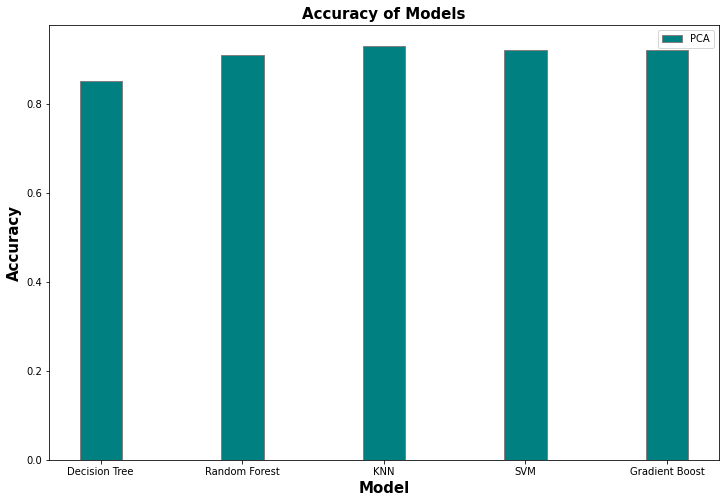

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
pca = [0.85, 0.91, 0.93, 0.92, 0.92]

 
# Set position of bar on X axis
br1 = np.arange(len(skb))
br2 = [x + barWidth for x in br1]

plt.title("Accuracy of Models",fontweight ='bold', fontsize = 15)

# Make the plot
plt.bar(br2, pca, color ='teal', width = barWidth,
        edgecolor ='grey', label ='PCA')

# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(skb))],
        ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Gradient Boost'])
 
plt.legend()
plt.show()

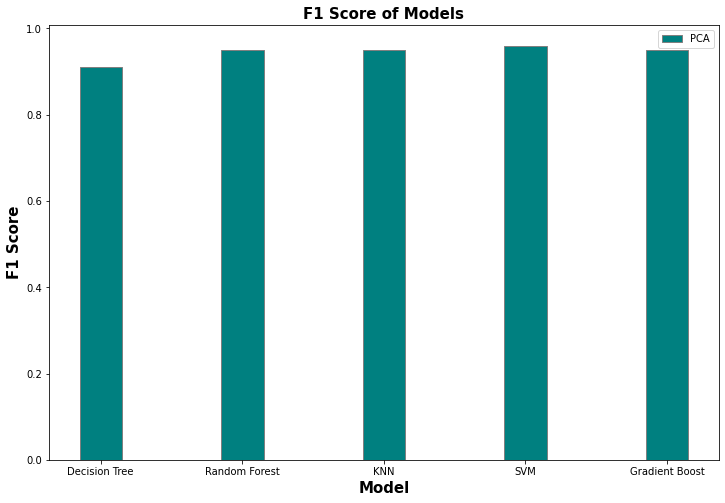

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
pcaf1 = [0.91, 0.95, 0.95, 0.96, 0.95]

 
# Set position of bar on X axis
br1 = np.arange(len(skbf1))
br2 = [x + barWidth for x in br1]

plt.title("F1 Score of Models",fontweight ='bold', fontsize = 15)

# Make the plot
plt.bar(br2, pcaf1, color ='teal', width = barWidth,
        edgecolor ='grey', label ='PCA')

# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('F1 Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(skbf1))],
        ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Gradient Boost'])
 
plt.legend()
plt.show()

Interestingly enough, F1 score for SVM is the highest.

Seems that for PCA, KNN seems to be the most accurate, with a score of 0.93.  

### **Feature Importance (Accuracy)**
Side by Side Comparison

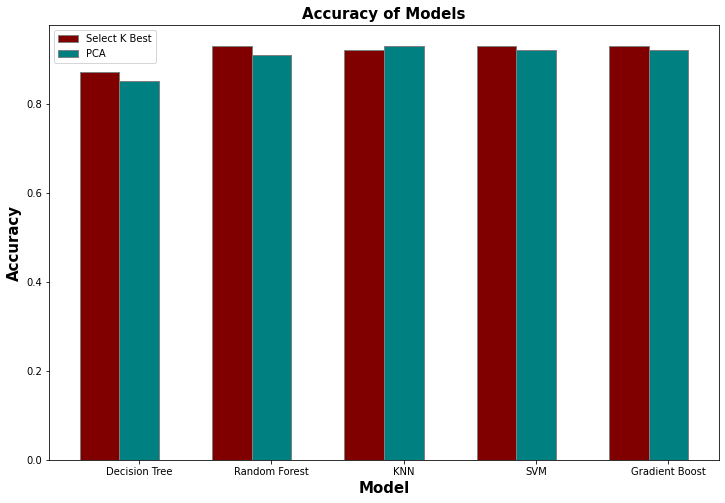

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
skb = [0.87, 0.93, 0.92, 0.93, 0.93]
pca = [0.85, 0.91, 0.93, 0.92, 0.92]

 
# Set position of bar on X axis
br1 = np.arange(len(skb))
br2 = [x + barWidth for x in br1]

plt.title("Accuracy of Models",fontweight ='bold', fontsize = 15)

# Make the plot
plt.bar(br1, skb, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Select K Best')
plt.bar(br2, pca, color ='teal', width = barWidth,
        edgecolor ='grey', label ='PCA')

# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(skb))],
        ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Gradient Boost'])
 
plt.legend()
plt.show()

Based on comparing the two, Random Forest and KNN seem to provide the highest results with Decision Tree providing the worst.  On average, Select K Best is producing higher accuracy than PCA.  

Based on this, I would select  Random Forest model with the Select K Best feature set.

### Feature Importance (F1 Score)

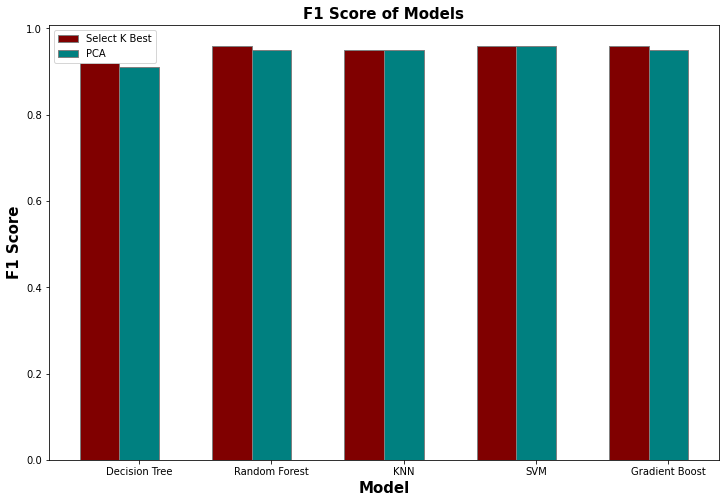

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
skbf1 = [0.92, 0.96, 0.95, 0.96, 0.96]
pcaf1 = [0.91, 0.95, 0.95, 0.96, 0.95]

 
# Set position of bar on X axis
br1 = np.arange(len(skbf1))
br2 = [x + barWidth for x in br1]

plt.title("F1 Score of Models",fontweight ='bold', fontsize = 15)

# Make the plot
plt.bar(br1, skbf1, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Select K Best')
plt.bar(br2, pcaf1, color ='teal', width = barWidth,
        edgecolor ='grey', label ='PCA')

# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('F1 Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(skbf1))],
        ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Gradient Boost'])
 
plt.legend()
plt.show()

Seems that Select K Best provides a better F Score than PCA.  Out of the models, Random Forest provides the highest results.  As such, I would select Random Forest model with the Select K Best Features as my model for predicting Churn.






## **5. Results:**

Based on a visual inspection, Random Forest Model provides the most accurate representation for predicting churn using the Select K Features.  

Now, the lack of newer data, as well as a huge resurgence of Non-Churners vs Churners could have had an impact its accuracy, 


### 6. Conclusion

To predict whether or not a customer will churn from a company or not, I would use the Random Forest model with the Select K Best Features.  

However, the other models were not any less accurate than Random Forest as they were quite close when it came to the results.  

It makes sense that Random Forest would yield such high results as their ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models.  The only shortcoming would be that it seems to favor Non-Churners over Churners just do to there being significantly more Non-Churners as a result.  

In order to improve the model, more data is needed.  Possibility more recent data with more of an even distribution of Churners and Non-Churners.  Perhaps more insight into the company itself and what service the customers sign up for would make it easier to reason why a customer would decide to churn.

To find more features, I would ask the company to provide any more client information they have. Some additional questions to ask about the client include "what services are you providing," or "what departments tend to have more churners" so we can see which faction of the companies seems to have significantly higher churners.
